# Notebook pour faire des statistiques

## Chargement des données

In [14]:
import pandas
import matplotlib
import seaborn as sns

In [15]:
historical = pandas.read_csv("data/historical.csv")

In [16]:
historical.head()

,stop_id,stop_name,trip_id,arrival_time,departure_time,stop_sequence,service_id,trip_short_name,direction_id,date
0,2238,La Défense (Grande Arche),1128309950655739,13:02:00,13:02:00,16,2830995,ZEUS,1,20190921
1,2238,La Défense (Grande Arche),1128309950655739,13:02:00,13:02:00,16,2830995,ZEUS,1,20190922
2,2238,La Défense (Grande Arche),1128309950655739,13:02:00,13:02:00,16,2830995,ZEUS,1,20190928
3,2238,La Défense (Grande Arche),1128309950655739,13:02:00,13:02:00,16,2830995,ZEUS,1,20190929
4,2238,La Défense (Grande Arche),1128309950655739,13:02:00,13:02:00,16,2830995,ZEUS,1,20191005


In [17]:
def str_to_hour(string) :
    hour = int(string[0:2])
    minute = int(string[3:5])
    seconds = int(string[6:8])
    return hour+minute/60+seconds/3600

In [18]:
def date_to_date(date) :
    year = date//10000
    month = (date-year*10000)//100
    day = date-year*10000-month*100
    return month*30+day

In [19]:
historical['arrival_time']=historical['arrival_time'].apply(str_to_hour)

In [20]:
historical['departure_time']=historical['departure_time'].apply(str_to_hour)

In [21]:
historical['date']=historical['date'].apply(date_to_date)

In [22]:
historical.head()

,stop_id,stop_name,trip_id,arrival_time,departure_time,stop_sequence,service_id,trip_short_name,direction_id,date
0,2238,La Défense (Grande Arche),1128309950655739,13.033333,13.033333,16,2830995,ZEUS,1,291
1,2238,La Défense (Grande Arche),1128309950655739,13.033333,13.033333,16,2830995,ZEUS,1,292
2,2238,La Défense (Grande Arche),1128309950655739,13.033333,13.033333,16,2830995,ZEUS,1,298
3,2238,La Défense (Grande Arche),1128309950655739,13.033333,13.033333,16,2830995,ZEUS,1,299
4,2238,La Défense (Grande Arche),1128309950655739,13.033333,13.033333,16,2830995,ZEUS,1,305


In [24]:
(historical['arrival_time']-historical['departure_time']).describe()

count    1144664.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
dtype: float64

C:\Users\stani\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arrival_time', ylabel='Density'>

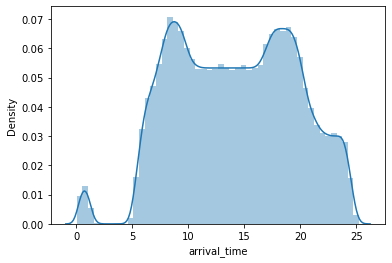

In [26]:
sns.distplot(historical['arrival_time'])

C:\Users\stani\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date', ylabel='Density'>

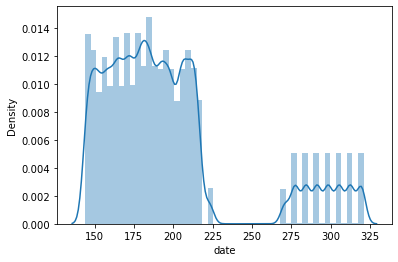

In [25]:
sns.distplot(historical['date'])

    - arrival_time = departure_time
    - dates wierd (holes)
    - we don't have the prediction of the RATP, just the trues passages of the trains/bus